In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
from multihist import Histdd

import flamedisx as fd

import os

2024-10-31 18:56:42.607677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-31 18:56:42.632280: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-31 18:56:42.632301: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 18:56:42.650100: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-31 18:56:43.907513: W tensorflow/compiler/tf

In [2]:
pdfs = [dict(), dict()]

## Background sources

In [3]:
SolarER = fd.xlzd.XLZDvERSource(configuration='40t',
                                drift_field_V_cm=80., gas_field_kV_cm=7.5,
                                elife_ns=10000e3, g1=0.27)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


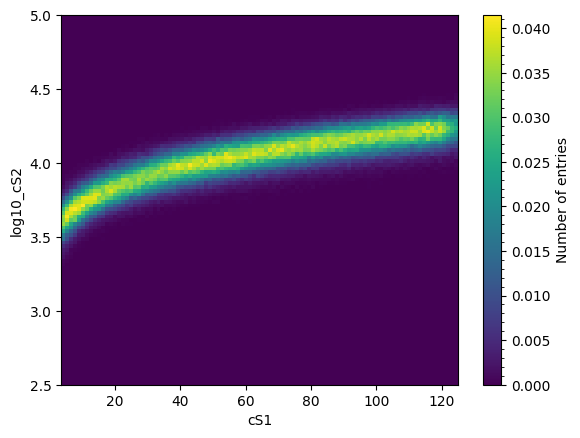

In [4]:
SolarER_hist = Histdd(bins=100, range=[[3.6, 125.], [2.5, 5.]], axis_names=['cS1', 'log10_cS2'])

SolarER_data = SolarER.simulate(int(1e6))

SolarER_hist.add(SolarER_data['cs1'], np.log10(SolarER_data['cs2']))

SolarER_mu = SolarER.estimate_mu(n_trials=int(1e6))
SolarER_hist.histogram = SolarER_hist.histogram / SolarER_hist.n * SolarER_mu

SolarER_hist.plot()

pdfs[0]['SolarER'] = SolarER_hist

In [5]:
Xe136 = fd.xlzd.XLZDXe136Source(configuration='40t',
                                drift_field_V_cm=80., gas_field_kV_cm=7.5,
                                elife_ns=10000e3, g1=0.27)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


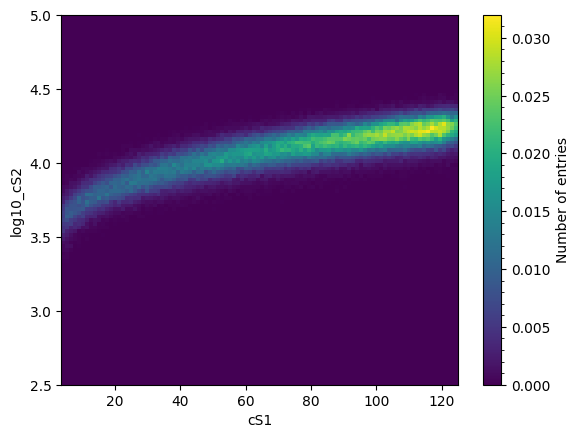

In [6]:
Xe136_hist = Histdd(bins=100, range=[[3.6, 125.], [2.5, 5.]], axis_names=['cS1', 'log10_cS2'])

Xe136_data = Xe136.simulate(int(1e6))

Xe136_hist.add(Xe136_data['cs1'], np.log10(Xe136_data['cs2']))

Xe136_mu = Xe136.estimate_mu(n_trials=int(1e6))
Xe136_hist.histogram = Xe136_hist.histogram / Xe136_hist.n * Xe136_mu

Xe136_hist.plot()

pdfs[0]['Xe136'] = Xe136_hist

In [7]:
Pb214 = fd.xlzd.XLZDPb214Source(configuration='40t',
                                drift_field_V_cm=80., gas_field_kV_cm=7.5,
                                elife_ns=10000e3, g1=0.27)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


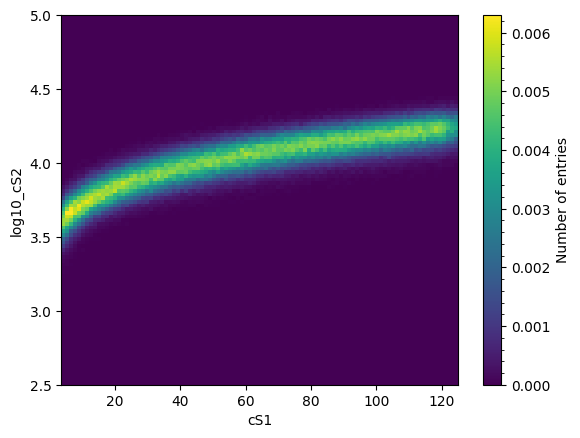

In [8]:
Pb214_hist = Histdd(bins=100, range=[[3.6, 125.], [2.5, 5.]], axis_names=['cS1', 'log10_cS2'])

Pb214_data = Pb214.simulate(int(1e6))

Pb214_hist.add(Pb214_data['cs1'], np.log10(Pb214_data['cs2']))

Pb214_mu = Pb214.estimate_mu(n_trials=int(1e6))
Pb214_hist.histogram = Pb214_hist.histogram / Pb214_hist.n * Pb214_mu

Pb214_hist.plot()

pdfs[0]['Pb214'] = Pb214_hist

In [9]:
Kr85 = fd.xlzd.XLZDKr85Source(configuration='40t',
                               drift_field_V_cm=80., gas_field_kV_cm=7.5,
                               elife_ns=10000e3, g1=0.27)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


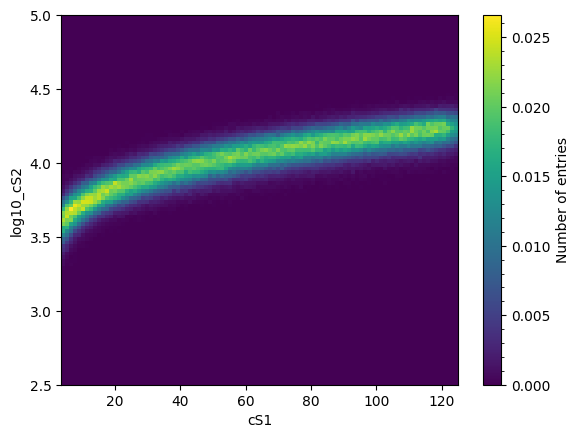

In [10]:
Kr85_hist = Histdd(bins=100, range=[[3.6, 125.], [2.5, 5.]], axis_names=['cS1', 'log10_cS2'])

Kr85_data = Kr85.simulate(int(1e6))

Kr85_hist.add(Kr85_data['cs1'], np.log10(Kr85_data['cs2']))

Kr85_mu = Kr85.estimate_mu(n_trials=int(1e6))
Kr85_hist.histogram = Kr85_hist.histogram / Kr85_hist.n * Kr85_mu

Kr85_hist.plot()

pdfs[0]['Kr85'] = Kr85_hist

In [11]:
CEvNS_solar = fd.xlzd.XLZDvNRSolarSource(configuration='40t',
                                         drift_field_V_cm=80., gas_field_kV_cm=7.5,
                                         elife_ns=10000e3, g1=0.27)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


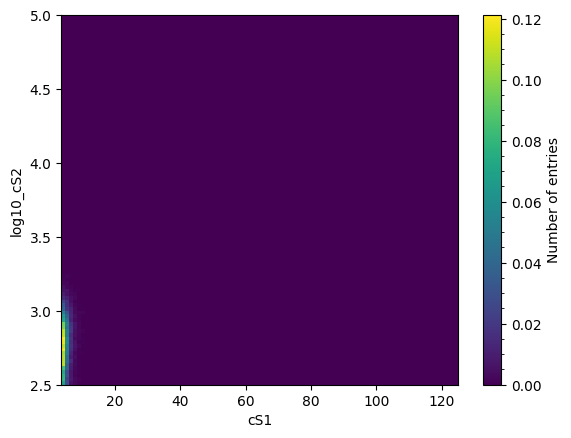

In [12]:
CEvNS_solar_hist = Histdd(bins=100, range=[[3.6, 125.], [2.5, 5.]], axis_names=['cS1', 'log10_cS2'])

CEvNS_solar_data = CEvNS_solar.simulate(int(1e6))

CEvNS_solar_hist.add(CEvNS_solar_data['cs1'], np.log10(CEvNS_solar_data['cs2']))

CEvNS_solar_mu = CEvNS_solar.estimate_mu(n_trials=int(1e6))
CEvNS_solar_hist.histogram = CEvNS_solar_hist.histogram / CEvNS_solar_hist.n * CEvNS_solar_mu

CEvNS_solar_hist.plot()

pdfs[0]['CEvNS_solar'] = CEvNS_solar_hist

In [13]:
CEvNS_other = fd.xlzd.XLZDvNROtherSource(configuration='40t',
                                         drift_field_V_cm=80., gas_field_kV_cm=7.5,
                                         elife_ns=10000e3, g1=0.27)

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


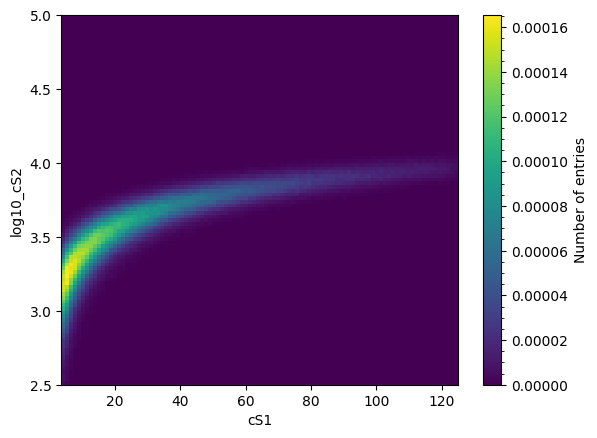

In [14]:
CEvNS_other_hist = Histdd(bins=100, range=[[3.6, 125.], [2.5, 5.]], axis_names=['cS1', 'log10_cS2'])

CEvNS_other_data = CEvNS_other.simulate(int(1e6))

CEvNS_other_hist.add(CEvNS_other_data['cs1'], np.log10(CEvNS_other_data['cs2']))

CEvNS_other_mu = CEvNS_other.estimate_mu(n_trials=int(1e6))
CEvNS_other_hist.histogram = CEvNS_other_hist.histogram / CEvNS_other_hist.n * CEvNS_other_mu

CEvNS_other_hist.plot()

pdfs[0]['CEvNS_other'] = CEvNS_other_hist

## Signal sources

In [15]:
masses = [9.0, 11.0, 16.0, 19.0, 32.0, 36.0, 40.0, 46.0,
          65.0, 91.0, 129.0, 182.0, 361.0, 508.0, 5000.0, 10000.0]

/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/global/homes/r/rjames97/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '40t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/global/homes/r/rjames97

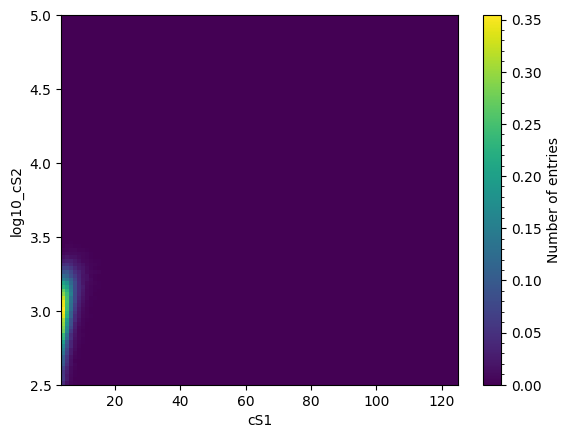

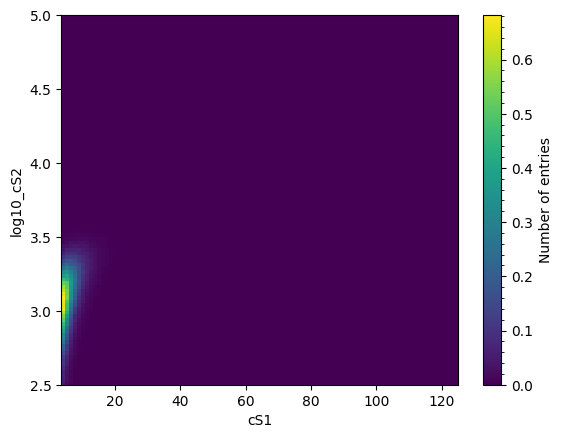

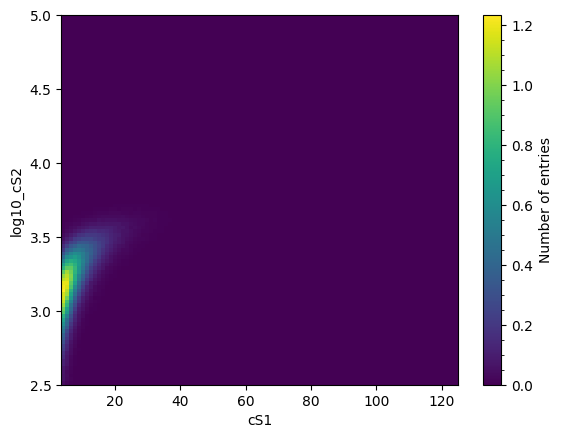

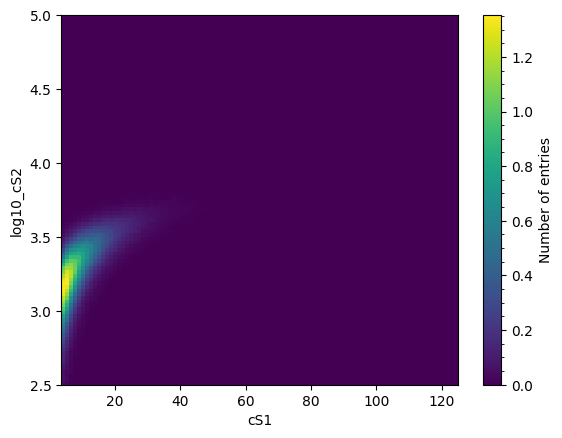

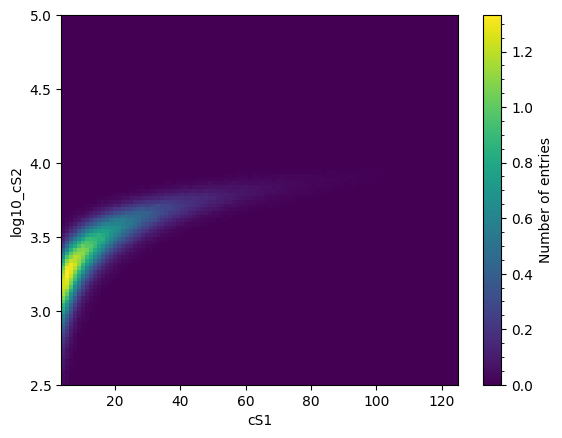

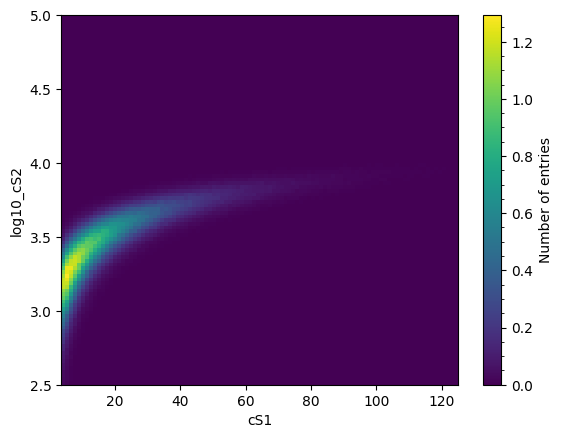

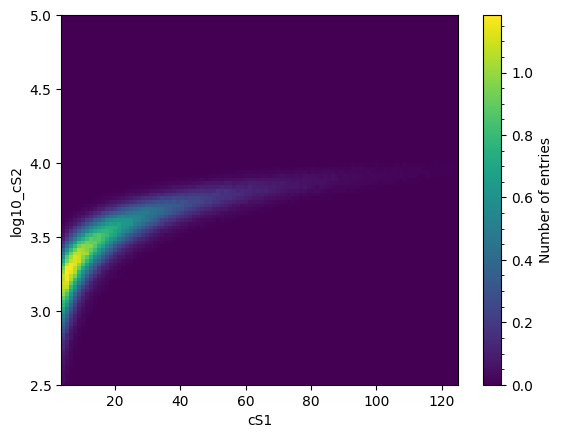

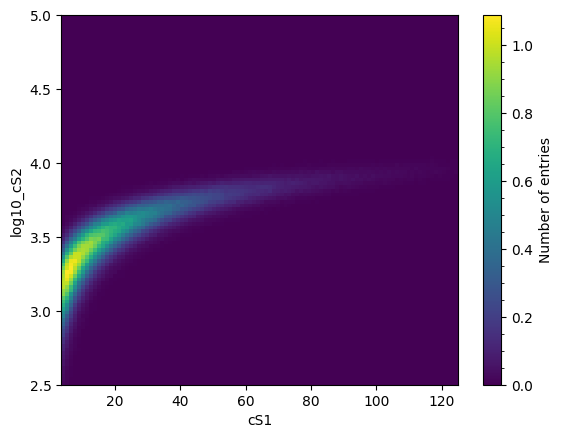

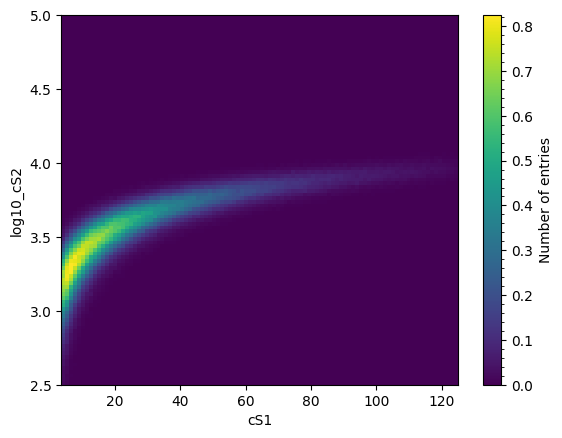

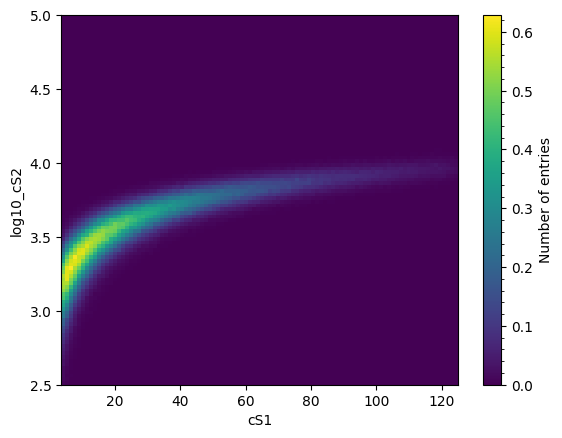

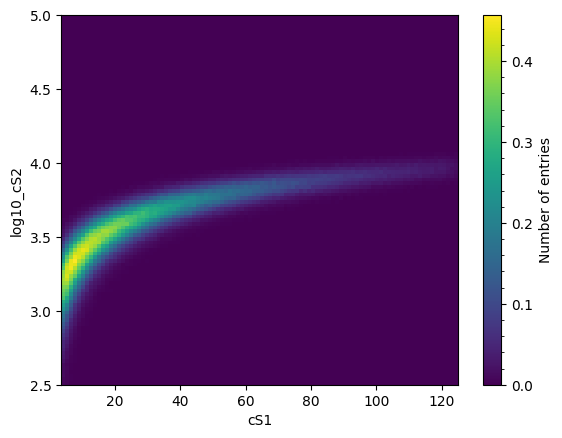

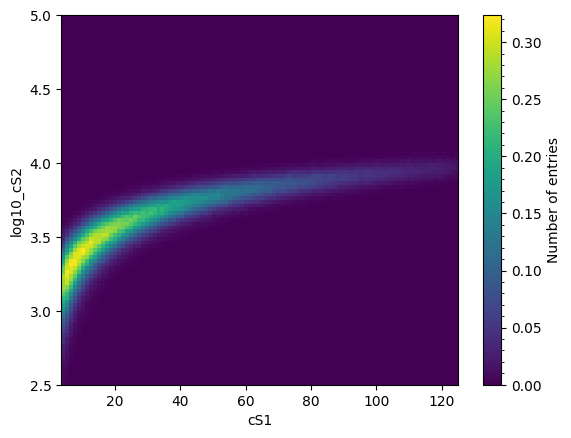

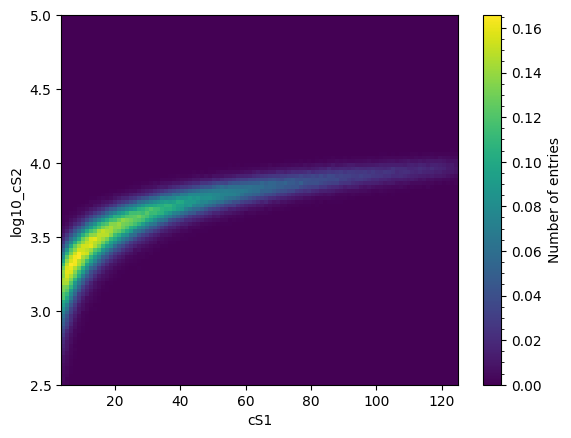

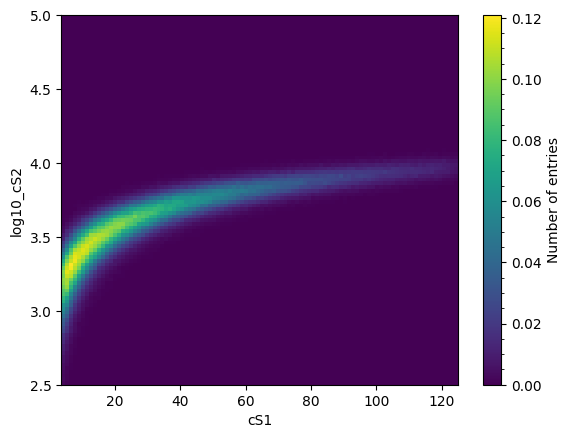

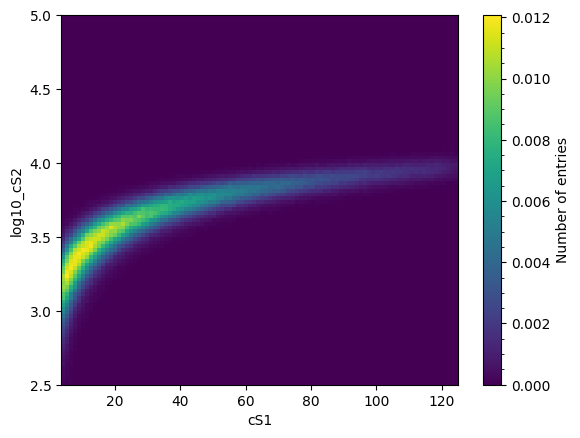

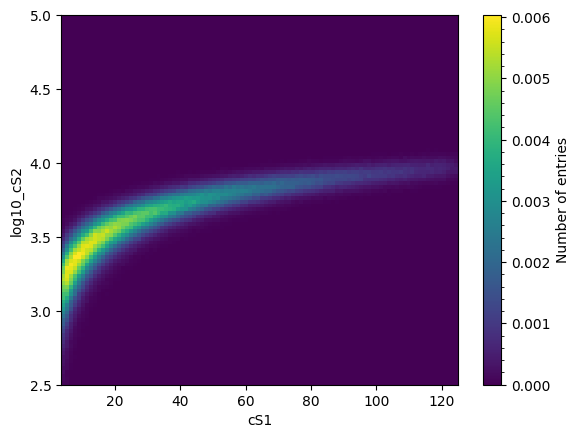

In [16]:
for mass in masses:
    WIMP = fd.xlzd.XLZDWIMPSource(wimp_mass=mass, configuration='40t',
                                 drift_field_V_cm=80., gas_field_kV_cm=7.5,
                                 elife_ns=10000e3, g1=0.27)
    
    WIMP_hist = Histdd(bins=100, range=[[3.6, 125.], [2.5, 5.]], axis_names=['cS1', 'log10_cS2'])

    WIMP_data = WIMP.simulate(int(1e6))

    WIMP_hist.add(WIMP_data['cs1'], np.log10(WIMP_data['cs2']))

    WIMP_mu = WIMP.estimate_mu(n_trials=int(1e6))
    WIMP_hist.histogram = WIMP_hist.histogram / WIMP_hist.n * WIMP_mu

    plt.figure()
    WIMP_hist.plot()

    pdfs[1][f'WIMP{mass:.0f}'] = WIMP_hist

## Save all PDFs

In [17]:
if not os.path.exists('PDFs'):
    os.makedirs('PDFs')

In [18]:
pkl.dump(pdfs, open('PDFs/pdfs_WIMP_SI_40t_140ty.pkl', 'wb'))